In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Pandas Overview

- The pandas library is used to deal with structured data stored in tables. You might aquire the structured data from CSV files, TSV files, SQL database tables, or spreadsheets. You can also *create* pandas Series and DataFrames. 


- "[P]andas objects (Index, Series, DataFrame) can be thought of as containers for arrays, which hold the actual data and do the actual computation. For many types, the underlying array is a numpy.ndarray." [source](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html)


- "A DataFrame is a two-dimensional array with labeled axes. In other words, a DataFrame is a matrix of rows and columns that have labels — column names for columns, and index labels for rows. A single column or row in a Pandas DataFrame is a Pandas series — a one-dimensional array with axis labels." [source](https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6)


- You can think of a pandas DataFrame like a table in SQL, Excel, or Google Sheets and a pandas Series like a single column from a table.

![dataframe diagram](https://www.w3resource.com/w3r_images/pandas-data-structure.svg)

[Image Source](https://www.w3resource.com/python-exercises/pandas/index.php)

## The Pandas Series Object

## <font color=red>What Is a Pandas Series?</font>

A pandas Series object is a one-dimensional, labeled array made up of an autogenerated index that starts at 0 and data of a single data type. Think of the index as the address of a data point; did you ever play the game Battleship? 

A couple of important things to note here:

- If I try to make a pandas Series using multiple data types like `int` and `string` values, the data will be converted to the same `object` data type; the `int` values will lose their `int` functionality. 


- A pandas Series can be created in several ways, some of which I'll demonstrate below, but **it will most often be created by slecting a single column from a pandas Dataframe in which case the Series retains the same index as the Dataframe.** 

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

### Create a Pandas Series:

#### From a Python List

In [47]:
# Here I create a list of colors creatively named 'colors'.

colors = ['red', 'yellow', 'green', 'blue', 'orange', 'red', 'violet', 'indigo']
colors

['red', 'yellow', 'green', 'blue', 'orange', 'red', 'violet', 'indigo']

In [48]:
# Here I create the 'colors_series' Series using the Series() constructor method.

colors_Series = pd.Series(colors)
colors_Series

0       red
1    yellow
2     green
3      blue
4    orange
5       red
6    violet
7    indigo
dtype: object

In [15]:
# How can I confirm that 'colors_series' is now a pandas Series object?
type(colors_Series)

pandas.core.series.Series

In [9]:
pd.Series?

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### From a NumPy Array

In [16]:
# Create a numpy array 'arr'.

arr = np.array([5, 10, 15, 20, 25, 30, 35, 40, 40])

In [19]:
# Convert my numpy array to a pandas Series called 'numeric_series'.
numeric_series = pd.Series(arr)
numeric_series

0     5
1    10
2    15
3    20
4    25
5    30
6    35
7    40
8    40
dtype: int64

In [20]:
# How can I confirm that 'numeric_series' is now a pandas Series object?

type(numeric_series)

pandas.core.series.Series

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### From a Python Dictionary. 

- Here the dictionary keys are used to construct the labeled index.

In [166]:
# Create a python dictionary.

data = {'a' : 0, 'b' : 1.5, 'c' : 2, 'd': 3.5, 'e': 4, 'f': 5.5}
data

{'a': 0, 'b': 1.5, 'c': 2, 'd': 3.5, 'e': 4, 'f': 5.5}

In [167]:
# Create a pandas Series 'diction_series' using the pandas Series() constructor method.

diction_series = pd.Series(data)
diction_series

a    0.0
b    1.5
c    2.0
d    3.5
e    4.0
f    5.5
dtype: float64

In [111]:
# Confirm the type of 'diction_series.'

type(diction_series)

pandas.core.series.Series

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### From a Pandas DataFrame

- When I select a column from a pandas DataFrame, this is also a Series object. It will retain the same index as the DataFrame.

*This is just a preview of acquiring data from a database as a DataFrame. For now, focus on the Series, not the code reading in the data. We will get plenty of practice using pandas functions to acquire data in the near future.*

```python
# Import my access information to connect to Codeup's database.

from env import host, password, user

# Function to connect to database.

def get_connection(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
```

```python
# Create SQL query to acquire desired data.

sql_query = '''
            SELECT 
                first_name,
                last_name,
                dept_name
            FROM employees AS e
            JOIN dept_emp AS de ON e.emp_no = de.emp_no
                AND to_date > CURDATE()
            JOIN departments AS d USING(dept_no)
            '''
```

```python
# Read data from database using sql and assign DataFrame to df.

df = pd.read_sql(sql_query, get_connection('employees'))
```

```python
# Write DataFrame to a csv to quickly read in data.

df.to_csv('names.csv')
```

In [12]:
# Read data in from my csv to a pandas DataFrame.

pd.read_csv('names.csv', index_col=0)

,first_name,last_name,dept_name
0,Huan,Lortz,Customer Service
1,Basil,Tramer,Customer Service
2,Breannda,Billingsley,Customer Service
3,Jungsoon,Syrzycki,Customer Service
4,Yuichiro,Swick,Customer Service
...,...,...,...
240119,Mihalis,Crabtree,Sales
240120,Guozhong,Felder,Sales
240121,Gino,Usery,Sales
240122,Nathan,Ranta,Sales


In [26]:
from pydataset import data

initiated datasets repo at: /Users/carolinesmac/.pydataset/


In [28]:
# This is a pandas DataFrame from which I will select Series I want to use below.

# I'll make a quick DF

df = data('iris')
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [29]:
# How can we return information about the index of this DataFrame?

df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            141, 142, 143, 144, 145, 146, 147, 148, 149, 150],
           dtype='int64', length=150)

In [30]:
# How can we return information about the columns of this DataFrame?

df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [35]:
df['Petal.Width']

1      0.2
2      0.2
3      0.2
4      0.2
5      0.2
6      0.4
7      0.3
8      0.2
9      0.2
10     0.1
11     0.2
12     0.2
13     0.1
14     0.1
15     0.2
16     0.4
17     0.4
18     0.3
19     0.3
20     0.3
21     0.2
22     0.4
23     0.2
24     0.5
25     0.2
26     0.2
27     0.4
28     0.2
29     0.2
30     0.2
31     0.2
32     0.4
33     0.1
34     0.2
35     0.2
36     0.2
37     0.2
38     0.1
39     0.2
40     0.2
41     0.3
42     0.3
43     0.2
44     0.6
45     0.4
46     0.3
47     0.2
48     0.2
49     0.2
50     0.2
51     1.4
52     1.5
53     1.5
54     1.3
55     1.5
56     1.3
57     1.6
58     1.0
59     1.3
60     1.4
61     1.0
62     1.5
63     1.0
64     1.4
65     1.3
66     1.4
67     1.5
68     1.0
69     1.5
70     1.1
71     1.8
72     1.3
73     1.5
74     1.2
75     1.3
76     1.4
77     1.4
78     1.7
79     1.5
80     1.0
81     1.1
82     1.0
83     1.2
84     1.6
85     1.5
86     1.6
87     1.5
88     1.3
89     1.3
90     1.3
91     1.2

In [41]:
# How can we return information about the values of this DataFrame?

petal_width_series = df['Petal.Width']
petal_width_series

1      0.2
2      0.2
3      0.2
4      0.2
5      0.2
6      0.4
7      0.3
8      0.2
9      0.2
10     0.1
11     0.2
12     0.2
13     0.1
14     0.1
15     0.2
16     0.4
17     0.4
18     0.3
19     0.3
20     0.3
21     0.2
22     0.4
23     0.2
24     0.5
25     0.2
26     0.2
27     0.4
28     0.2
29     0.2
30     0.2
31     0.2
32     0.4
33     0.1
34     0.2
35     0.2
36     0.2
37     0.2
38     0.1
39     0.2
40     0.2
41     0.3
42     0.3
43     0.2
44     0.6
45     0.4
46     0.3
47     0.2
48     0.2
49     0.2
50     0.2
51     1.4
52     1.5
53     1.5
54     1.3
55     1.5
56     1.3
57     1.6
58     1.0
59     1.3
60     1.4
61     1.0
62     1.5
63     1.0
64     1.4
65     1.3
66     1.4
67     1.5
68     1.0
69     1.5
70     1.1
71     1.8
72     1.3
73     1.5
74     1.2
75     1.3
76     1.4
77     1.4
78     1.7
79     1.5
80     1.0
81     1.1
82     1.0
83     1.2
84     1.6
85     1.5
86     1.6
87     1.5
88     1.3
89     1.3
90     1.3
91     1.2

**For now, all you need to know is that a Series can be selected from a DataFrame in one of the following ways:**

- **By Passing a Column Name as a String to the Indexing Operator *aka Bracket Notation*.**

```python
df['series']
```

In [44]:
# Grab a Series using bracket notation. Assign it to a variable called 'names'.


In [60]:
# Validate the object type of 'names'.
names = df['Petal.Length']
names

1      1.4
2      1.4
3      1.3
4      1.5
5      1.4
6      1.7
7      1.4
8      1.5
9      1.4
10     1.5
11     1.5
12     1.6
13     1.4
14     1.1
15     1.2
16     1.5
17     1.3
18     1.4
19     1.7
20     1.5
21     1.7
22     1.5
23     1.0
24     1.7
25     1.9
26     1.6
27     1.6
28     1.5
29     1.4
30     1.6
31     1.6
32     1.5
33     1.5
34     1.4
35     1.5
36     1.2
37     1.3
38     1.4
39     1.3
40     1.5
41     1.3
42     1.3
43     1.3
44     1.6
45     1.9
46     1.4
47     1.6
48     1.4
49     1.5
50     1.4
51     4.7
52     4.5
53     4.9
54     4.0
55     4.6
56     4.5
57     4.7
58     3.3
59     4.6
60     3.9
61     3.5
62     4.2
63     4.0
64     4.7
65     3.6
66     4.4
67     4.5
68     4.1
69     4.5
70     3.9
71     4.8
72     4.0
73     4.9
74     4.7
75     4.3
76     4.4
77     4.8
78     5.0
79     4.5
80     3.5
81     3.8
82     3.7
83     3.9
84     5.1
85     4.5
86     4.5
87     4.7
88     4.4
89     4.1
90     4.0
91     4.4

- **Using Attribute Access *aka Dot Notation*.**

```python
df.series
```

In [19]:
# Grab a Series using dot notation. Assign it to a variable called 'dept_names'.



In [20]:
# Validate the object type of 'dept_name'.



<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

## <font color=orange>So What's So Great About a Pandas Series?</font>

**A Series...**

- can handle any data type.


- allows for fast indexing and subsetting of data.


- has lots of built-in attributes and methods.


- is optimized for Pandas vectorized functions.

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

### Attributes

**Attributes** return useful information about the Series properties; they don't perform operations or calculations with the Series.

- Jupyter Notebook allows you to quickly access a list of available attributes by pressing the tab key after the series name followed by a period or dot; this is called dot notation or attribute access.

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

### Common Attributes

#### `.index`,  `.values`

**The Components of a Pandas Series - Index, Data**

- Now that I have some pandas Series to work with, I can look at the components of the Series object using the `.index` and the `.values` attributes.

In [50]:
# I can access its autogenerated index by using the .index attribute.
colors_Series.index

RangeIndex(start=0, stop=8, step=1)

In [51]:
# I can access its data by using the .values attribute.
colors_Series.values


array(['red', 'yellow', 'green', 'blue', 'orange', 'red', 'violet',
       'indigo'], dtype=object)

In [52]:
petal_width_series.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            141, 142, 143, 144, 145, 146, 147, 148, 149, 150],
           dtype='int64', length=150)

In [54]:
np.sum(petal_width_series.values)

179.90000000000003

In [55]:
# I can see that accessing the data in my Series using the .values attribute returns a numpy array.

colors_Series.dtype

dtype('O')

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.dtype`

- The `.dtype` attribute returns the pandas data type for the Series. 

**Below is a helpful overview of pandas data types and their relation to python and NumPy data types.**

![pandas data types](https://pbpython.com/images/pandas_dtypes.png)

In [56]:
# What is the data type of our 'colors_series' Series?

colors_Series.dtype

dtype('O')

In [57]:
# What is the data type of our 'numeric_series' Series?
numeric_series.dtype


dtype('int64')

In [61]:
# What is the data type of our 'names' Series?
names.dtype


dtype('float64')

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.size`

- The `.size` attribute returns an int representing the number of rows in the Series.

In [62]:
# What is the size of our 'colors_series' Series?
colors_Series.size



8

In [63]:
# What is the size of our 'numeric_series' Series?
numeric_series.size


9

In [64]:
# What is the size of our 'names' Series?

names.size

150

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.shape`

- The `.shape` attribute returns a tuple representing the rows and columns in a DataFrame, but it can also be used on a Series to return the rows. 

In [65]:
# What is the shape of our 'names' Series?

names.shape

(150,)

In [66]:
df.shape

(150, 5)

In [67]:
df.size

750

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

### Methods

**Methods** used on pandas Series objects often return new Series objects; most also offer parameters with default settings designed to keep the user from mutating the original Series objects. (`inplace=False`)

- I can either assign the transformed Series to a variable or adjust my parameters. 

<div class="alert alert-block alert-warning">Be careful about mutating your original data, and always, always confirm that the data you are working with is the data, and data type, that you think you are working with!</div>

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

## <font color=green>Now What?</font>

#### `.head()`, `.tail()`,  `.sample()`

- The `.head(n)` method returns the first n rows in the Series; `n = 5` by default. This method returns a new Series with the same indexing as the original Series. 


- The `.tail(n)` method returns the last n rows in the Series; `n = 5` by default. Increase or decrease your value for n to return more or less than 5 rows.


- The `.sample(n)` method returns a random sample of rows in the Series; `n = 1` by default. Again, the index is retained.

In [73]:
# Grab the first five rows in our 'names' Series; the default is the first 5 rows.

names.head()

1    1.4
2    1.4
3    1.3
4    1.5
5    1.4
Name: Petal.Length, dtype: float64

In [74]:
# Grab the last two rows of the 'names' Series; we can pass 2 as our argument to n.
names.tail(2)

149    5.4
150    5.1
Name: Petal.Length, dtype: float64

In [77]:
# Grab a random sample of 10 rows from the 'names' Series; the default argument is 1.

colors_Series.sample(5)

0       red
7    indigo
4    orange
6    violet
1    yellow
dtype: object

In [82]:
# What type of object is returned by the `.head()`, `.tail()`, or `.sample()` methods?

type(colors_Series.sample(1))

pandas.core.series.Series

In [81]:
colors_Series.head().values

array(['red', 'yellow', 'green', 'blue', 'orange'], dtype=object)

In [86]:
# value counts call similarly to group by in mySQL
colors_Series.value_counts()
# now the colors are the index of this series

red       2
yellow    1
green     1
blue      1
orange    1
violet    1
indigo    1
dtype: int64

In [87]:
val_counts = colors_Series.value_counts()
val_counts.index

Index(['red', 'yellow', 'green', 'blue', 'orange', 'violet', 'indigo'], dtype='object')

In [88]:
colors_Series.describe()
# gives descriptive statistics about our series

count       8
unique      7
top       red
freq        2
dtype: object

In [89]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [90]:
petal_width_series.describe()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: Petal.Width, dtype: float64

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.astype()`

- The `.astype()` method allows me to convert a Series from one data type to another. 


- Like most methods, it returns a new transformed Series by default instead of mutating my original data.

In [83]:
# How can I change the data type of `numeric_series` to an object?

numeric_series.dtype

dtype('int64')

In [99]:
numeric_series.astype('float')

0     5.0
1    10.0
2    15.0
3    20.0
4    25.0
5    30.0
6    35.0
7    40.0
8    40.0
dtype: float64

In [98]:
print(str(numeric_series))
numeric_series.astype(str)

0     5
1    10
2    15
3    20
4    25
5    30
6    35
7    40
8    40
dtype: int64


0     5
1    10
2    15
3    20
4    25
5    30
6    35
7    40
8    40
dtype: object

In [94]:
dict(petal_width_series.describe())['min']

0.1

In [95]:
# Did this transform the data type of my 'numeric_series'?
# Nope! Still a series

type(numeric_series.astype(float))

pandas.core.series.Series

In [ ]:
# if you try to cast colors_series to float or int, it will break
# numbers can be str, but str is more complicated 

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.value_counts()`

- The `.value_counts()` method returns a new Series consisting of a labeled index representing the unique values from the original Series and values representing the frequency each unique value appears in the original Series. 


- This is an extremely useful method you will find yourself using often with Series containing object and category data types. 

Below you can see the default settings for the method's parameters.

```python
series.value_counts(
    normalize=False,
    sort=True,
    ascending=False,
    bins=None,
    dropna=True,
)
```

In [100]:
# How can I obtain the frequency of unique values in 'colors_series'?
colors_Series.value_counts()


red       2
yellow    1
green     1
blue      1
orange    1
violet    1
indigo    1
dtype: int64

In [101]:
# How can I obtain the relative frequency of the unique values in 'colors_series'?

colors_Series .value_counts(normalize=True)

red       0.250
yellow    0.125
green     0.125
blue      0.125
orange    0.125
violet    0.125
indigo    0.125
dtype: float64

In [102]:
colors_Series .value_counts(ascending=True)

yellow    1
green     1
blue      1
orange    1
violet    1
indigo    1
red       2
dtype: int64

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.sort_values()` and `.sort_index()`

- These are handy methods that allow you to either sort your values or index respectively in ascending or descending order.

In [103]:
# How can I obtain my 'colors_series' with the values in alphabetical order?

colors_Series.sort_values()

3      blue
2     green
7    indigo
4    orange
0       red
5       red
6    violet
1    yellow
dtype: object

In [105]:
# How can I reverse the order?

colors_Series.sort_values(ascending = False)

1    yellow
6    violet
0       red
5       red
4    orange
7    indigo
2     green
3      blue
dtype: object

In [108]:
# How can I obtain my 'numeric_series' ordered from least to greatest values?

numeric_series.sort_values()

0     5
1    10
2    15
3    20
4    25
5    30
6    35
7    40
8    40
dtype: int64

In [42]:
# How can I reverse the order?



In [112]:
# How can I sort my labeled index in 'diction_series' to be in reverse alphabetical order?



NameError: name 'diction' is not defined

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.describe()`

- The `.describe()` method can be used to return descriptive statistics on either a pandas Series or DataFrame object; the information it returns depends on whether it's used on a numerical or non-numerical Series. 


- *Note that when used on a DataFrame, `.describe()` analyzes only the numerical columns by default. The parameters can be adjusted to include other data types.*

```python
series_or_df.describe(percentiles=None, include=None, exclude=None)
```

In [44]:
# What does the .describe() method return if our Series values are strings? (Try 'dept_names' or 'colors_series')



In [45]:
# Validate that the .describe() method returns a new Series.



In [46]:
# What does the .describe() method return if our Series values are numeric? (Try 'numeric_series')



<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.any()` and `.all()`

- The `.any()` method performs a logical `OR` operation on a row or column and returns a bool value indicating whether **any of the elements are True**.

In [115]:
# Are any of the values in my 'colors_series' 'red'?
# boolean masking => vectorizing a truth statement across an array
(colors_Series == 'red').any()

True

In [116]:
# How can I check to see if any of the values in `numeric_series` are less than 0?
numeric_series < 0


0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

In [ ]:
colors_Series

- The `.all()` method performs a logical `AND` operation on a row or column and returns a bool value indicating whether **all of the elements are True**.

In [119]:
# Are all of the values in 'colors_series' 'red'?

my_red_series = (colors_Series == 'red')
my_red_series.all()

False

In [50]:
# Are all of the values in the 'dept_names' Series 'Customer Service'?



<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### String Methods

- **String Methods** perform vectorized string operations on each string value in the original Series and return a transformed copy of the original Series. 


- We have to use the `.str` attribute to access the string method. 

```python
series.str.string_method()
```

- More string methods listed [here](https://docs.python.org/2.5/lib/string-methods.html).

In [124]:
# How can I capitalize every string in my 'colors_series'?

print('red'.capitalize())
colors_Series.str.capitalize()


Red


0       Red
1    Yellow
2     Green
3      Blue
4    Orange
5       Red
6    Violet
7    Indigo
dtype: object

In [125]:
# How can I check to see if the string values in my 'colors_series' start with the letter 'r'?
colors_Series.str.startswith('r')


0     True
1    False
2    False
3    False
4    False
5     True
6    False
7    False
dtype: bool

In [126]:
# How could I remove all of the 'e's in my 'colors_series'?

colors_Series.str.replace('e', '')

0        rd
1     yllow
2       grn
3       blu
4     orang
5        rd
6     violt
7    indigo
dtype: object

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

<a id='chaining'></a>

#### Method Chaining

- Since many pandas Series methods return a new Series object, I can call one method after another using dot notation to chain them together.
```python
series.method().method().method()
```

In [128]:
# Can I generate a boolean Series identifying values in 'colors_series' ending with the letter `d`.

colors_Series.str.replace('e','').str.replace('o','0').str.capitalize()

0        Rd
1     Yll0w
2       Grn
3       Blu
4     0rang
5        Rd
6     Vi0lt
7    Indig0
dtype: object

In [131]:
# Can I return the actual values from 'colors_series' ending with the letter 'd'.

ends_with_d = colors_Series.str.endswith('d')
colors_Series[ends_with_d]

0    red
5    red
dtype: object

In [134]:
# Can I use method chaining to also make those values all uppercased?
colors_Series[ends_with_d].str.upper()


0    RED
5    RED
dtype: object

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.apply()`

- The `.apply()` method accepts a python or NumPy function as an argument and applies that function to each element in my Series. 


- *`.apply()` does not only accept a built-in function as an argument; you can pass custom and even lambda functions as arguments.*

>**Scenario:** What if I want to know the length of each element in my `colors_series` Series? What if I then want to see the frequency of the unique values in the Series returned?

In [140]:
# How can I use `.apply()` with a lambda function to count the letter 'r' in each value in my 'colors_series'?

# any function can be applied with the apply()

my_red_count = 'rrrred'
lambda x: x.count('r')
colors_Series.apply(lambda x: x.count('r'))

0    1
1    0
2    1
3    0
4    1
5    1
6    0
7    0
dtype: int64

In [137]:
# Create custom function I can apply to each element in my 'colors_series'; it must take in a string argument.

def red_or_not(string):
    if string.lower() == 'red':
        return 'red'
    else:
        return 'not_red'

In [138]:
# How can I use the `.apply()` method with my custom function to return a new Series?

colors_Series.apply()

0        red
1    not_red
2    not_red
3    not_red
4    not_red
5        red
6    not_red
7    not_red
dtype: object

In [141]:
# How can I use method chaining to get a count of each unique value in this new Series?

colors_Series.apply(red_or_not).value_counts()

not_red    6
red        2
dtype: int64

<div class="alert alert-block alert-info"><b>Remember:</b> Unless I assign the Series returned from using the functions and methods above, my original Series data remains the same. If I want to keep the Series with weekend and weekday labels, I have to assign it to a variable.</div>

In [142]:
# Confirm that my 'colors_series' still contains its original values.

colors_Series

0       red
1    yellow
2     green
3      blue
4    orange
5       red
6    violet
7    indigo
dtype: object

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.isin()`

- The `.isin()` method returns a boolean Series with the same index as the original Series. 

    - `True` values indicate that the original Series value at a given index position is in the sequence.
    
    - `False` values indicate that the original value is not present in the sequence.

```python
series.isin(values)
```

In [190]:
# Create a list of colors.

my_colors = ['black', 'white', 'red']
colors_Series

0       red
1    yellow
2     green
3      blue
4    orange
5       red
6    violet
7    indigo
dtype: object

In [189]:
# How can I check which values in `colors_series` are in the 'my_colors' list and create a new Series 'bools'?
[colors_Series.isin(my_colors)]
colors_Series[colors_Series.isin(my_colors)]

0    red
5    red
dtype: object

**This is handy, but what if I want to access the actual observations or rows where the condition is True for being in the `my_colors` list, not just the bool values True or False?** 

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

### The Indexing Operator `[]`

- This is where the pandas index shines; we can select subsets of our data using index labels, index position, or boolean sequences (list, array, Series).


- Earlier, I demonstrated that bracket notation, `df['series']` can be used to pull a Series from a pandas DataFrame when a column label is passed into the indexing operator `[]`. 


- I can also pass a sequence of boolean values to the indexing operator; that sequence could be a list or array, but it can also be another pandas Series **if the index of the boolean Series matches the original Series**.

>**Example:** Here I use the boolean Series `bools` that I created above as the selector in the indexing operator for `colors_series`. This returns only the rows in `colors_series` where the value is `True` in our boolean Series, `bools`. 
- Since I created my boolean Series from my original Series, they share the same index. That's what makes this operation possible.

In [156]:
# What type of pandas object is my 'bools' Series? 
bools = colors_Series.isin(my_colors)
print(type(bools))
print(bools)

<class 'pandas.core.series.Series'>
0     True
1    False
2    False
3    False
4    False
5     True
6    False
7    False
dtype: bool


In [155]:
# Which rows meet my conditional above?

colors_Series[bools]

0    red
5    red
dtype: object

**How can I return the actual values from `colors_series` where my condition is being met, the value is `red`, instead of just a True or False value?**

In [66]:
# Use the boolean Series as a selector for values in 'colors_series' that meet my condition.



In [158]:
# I can skip the middle woman and pass a conditional directly into the indexing operator.
# directly into the indexing operator

colors_Series[colors_Series.isin(['red', 'black', 'orange'])]


0       red
4    orange
5       red
dtype: object

>**Example of Indexing with a Labeled Index**

- Recall that our `diction_series` has a labeled index.


- Notice that the indexing is inclusive when using index labels.

In [165]:
# Can I return a subset of the first three rows of 'diction_series' using labels instead of integer positions?



0    <function data at 0x122fe9dc0>
dtype: object

In [69]:
# Can I return a subset of 'diction_series' containing only rows ['a', 'd', 'f']?



<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

### Binning Data

- I can bin continuous data to convert it to categorical data.


- We will look at two different ways I can accomplish binning below.
    - `.value_counts()`
    - `pd.cut()`

In [169]:
# I need a numerical Series to work with here; I'll import the 'tips' dataset from pydataset.

from pydataset import data

tips = data('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [171]:
# How can I create a Series named `tip` from our tips DataFrame above.

tip = tips.tip
type(tip)

pandas.core.series.Series

In [173]:
# How can I see the descriptive statistics for this Series?
tip.describe()


count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [176]:
# How can I create 5 bins of equal size using `.cut()`? What is the data type of this Series of bins?

pd.cut(tip, 5)

1      (0.991, 2.8]
2      (0.991, 2.8]
3        (2.8, 4.6]
4        (2.8, 4.6]
5        (2.8, 4.6]
           ...     
240      (4.6, 6.4]
241    (0.991, 2.8]
242    (0.991, 2.8]
243    (0.991, 2.8]
244      (2.8, 4.6]
Name: tip, Length: 244, dtype: category
Categories (5, interval[float64, right]): [(0.991, 2.8] < (2.8, 4.6] < (4.6, 6.4] < (6.4, 8.2] < (8.2, 10.0]]

In [177]:
# How can I return a Series with my unique bin values as the index and the frequency of each bin as the value.

pd.cut(tip, 5).value_counts()

(0.991, 2.8]    120
(2.8, 4.6]       93
(4.6, 6.4]       24
(6.4, 8.2]        5
(8.2, 10.0]       2
Name: tip, dtype: int64

In [75]:
# Is there another way I can bin my 'tip' data get the value counts like I did above? Spoiler alert, Yes!



<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.plot()`

- **The `.plot()` method** allows us to quickly visualize the data in our Series.


- By default, Matplotlib will choose the best type of plot for us.


- We can also customize our plot if we like.

Check the docs [here](https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.Series.plot.html) for more on the `.plot()` method.

<AxesSubplot:>

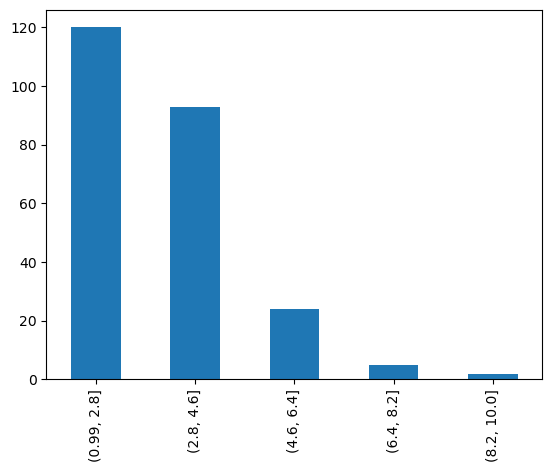

In [178]:
# How can I make a quick plot of the data in the 'tip' Series? (bar plot)

tip.value_counts(bins=5).plot.bar()

<AxesSubplot:>

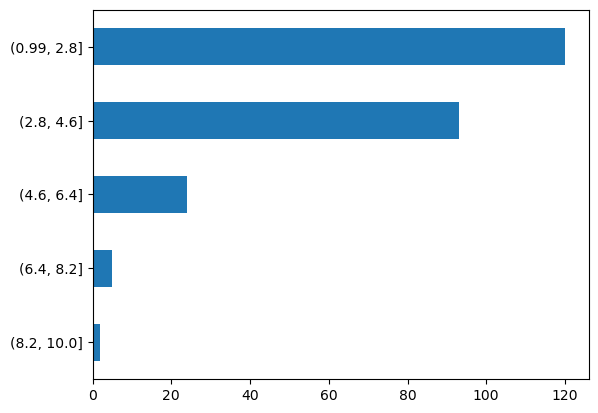

In [179]:
# How can I make a quick plot of the data in the 'tip' Series? (horizontal bar plot using value_count(bins=5))

tip.value_counts(bins=5).sort_values().plot.barh()

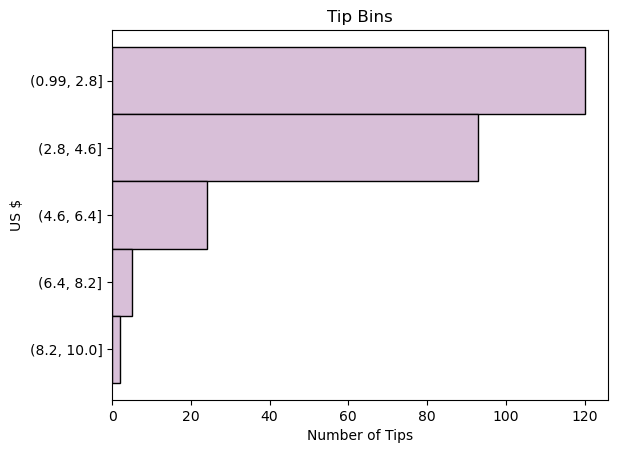

In [182]:
# I can clean up my plot and add labels.

tip.value_counts(bins=5).plot.barh(color='thistle', 
                                   width=1, 
                                   ec='black')

plt.title('Tip Bins')
plt.xlabel('Number of Tips')
plt.ylabel('US $')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()
plt.show()

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.cut()`

- The pandas `.cut()` function allows me to create bins of equal size to convert a continuous variable to a categorical variable if I like. 


- This function has parameters that make it versatile; I can define my own bin edges and labels.

```python
# Defaults for parameters I will use in this example.

pd.cut(x, bins, labels=None, include_lowest=False)
```

<div class="alert alert-block alert-info"><b>Note:</b> The lower bounds of the bins are open-ended while the upper bounds are closed-ended by default; there are parameters if you want to adjust this behavior.</div>

In [187]:
# Define bin edges.
bin_edges = [0, 2, 4, 6, 8, 10.01]

# Create a list of bin labels; you should have one less than bin edges.
bin_labels = ['$0-1.99', '$2.00-3.99', '$4.00-5.99', '$6.00-7.99', '$8.00-10.00']

# Use the .cut() function to create 5 bins as defined and labeled and create Series of value_counts sorted by index value.
pd.cut(tip, bins=bin_edges, labels=bin_labels, include_lowest=True).value_counts().sort_index()

$0-1.99         78
$2.00-3.99     125
$4.00-5.99      34
$6.00-7.99       5
$8.00-10.00      2
Name: tip, dtype: int64

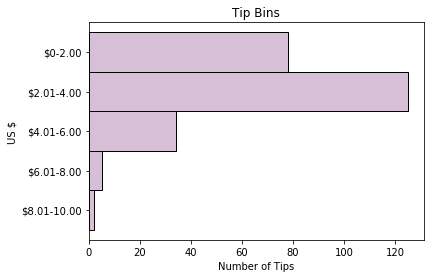

In [255]:
# Define bin edges
bin_edges = [0, 2, 4, 6, 8, 10.01]

# Create a list of bin labels
bin_labels = ['$0-2.00', '$2.01-4.00', '$4.01-6.00', '$6.01-8.00', '$8.01-10.00']

# Use the .cut() function to create my 5 equal-sized bins and create a horizontal bar plot to visualize value_counts().
pd.cut(tip, bins=bin_edges, labels=bin_labels, include_lowest=True).value_counts().sort_index().plot.barh(color='thistle', width=1, ec='black')

# Axes labels and plot title
plt.title('Tip Bins')
plt.xlabel('Number of Tips')
plt.ylabel('US $')

# Reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

# Clean up plot display
plt.show()